# Regression

## <font color='brown'> Episode - 2</font>

Import quandl, math, pandas and use quandl.get() function to get our dataframe. and assign it to df

In [1]:
import quandl

In [2]:
import math

In [3]:
import pandas as pd

In [4]:
df = quandl.get('WIKI/GOOGL')

In [5]:
df.head() # see some lines

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [6]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [7]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0

In [8]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [9]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [10]:
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


## <font color='green + red + blue + yellow'> Episode - 3

In [11]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace =True)

In [12]:
forecast_out = int(math.ceil(0.01 * len(df)))

In [13]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [14]:
df.dropna(inplace = True, axis = 0)
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2018-01-30     1177.37  0.896914   -0.029718    1792602.0  1094.00
2018-01-31     1182.22  0.346805   -0.134312    1643877.0  1053.15
2018-02-01     1181.59  0.495942    0.476195    2774967.0  1026.55
2018-02-02     1119.20  1.081129   -0.729098    5798880.0  1054.09
2018-02-05     1068.76  4.325574   -2.893850    3742469.0  1006.94


## <font color='orange'>Episode - 4

<font color='blue'> Importing some more libraies and modules like sklearn's preprocessing library svm(support vector machine)</font>

In [15]:
import numpy as np
from sklearn import preprocessing, svm

<font color='orange'>We need to drop empty entries for training our model

In [16]:
df.dropna(inplace=True)

In [17]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

In [18]:
X = preprocessing.scale(X)# scale X so it is fit for training and testing.

In [19]:
y = np.array(df['label'])

<font color='cyan'>We need to split the data into training and testing

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<font color='purple'>We can make a regression model using svm and selecting the SVR method. Then we would use the fit function to train our model using the x_train and y_train.

In [21]:
clf = svm.SVR() # SVR is support vector regression.
clf.fit(X_train, y_train)

C:\Users\Tejas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

<font color='orange'>We can get the accuracy of the model by using the model's score function

In [22]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.7837706740814739


<font color='red'>We can use simple linear regression model instead of a support vector machine

In [23]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9768815988441614


<font color='green'>Some of the machine learning algorithms here will process one step at a time, with no threading, others can thread and use all the CPU cores you have available. you can visit the documentation, and look for the n_jobs parameter. If it has n_jobs, you have an algorithm that can be threaded for high performance. Thus, if you are processing massive amounts of data, or you need to process medium data but at a very high rate of speed, then you would want something threaded. Let's check for our two algorithms.

For sklearn.svm.SVR, and looking through the parameters, do not see n_jobs. As you could see, on our small data, it makes very little difference, but, on say even as little as 20mb of data, it makes a massive difference. LinearRegression algorithm we see n_jobs here. We can specify exactly how many threads you'll want. If you put in -1 for the value, then the algorithm will use all available threads.
To do this:

In [24]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9768815988441614


<font color='cyan'>Think of a kernel like a transformation against your data. It's a way to grossly, and I mean grossly, simplify your data. This makes processing go much faster. In the case of svm.SVR, the default is rbf, which is a type of kernel. You have a few other choices though. Check the documentation, you have 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. Again, just like the suggestion to try the various ML algorithms that can do what you want, try the kernels. Let's do a few:

In [25]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(k,accuracy)

linear 0.9763627181322717


C:\Users\Tejas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


poly 0.6445602710818543


C:\Users\Tejas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf 0.7837706740814739


C:\Users\Tejas\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


sigmoid 0.8878304767661286


## <font color='cyan'>Episode - 5

Till this point we have seen all this. We add one more line

In [26]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:] # <--------------- Here is the new line
X = X[:-forecast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9782243229597284


In [27]:
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)

[1099.02497133 1071.691638   1016.70209072 1056.86317139 1072.92137478
 1073.71713538 1091.12668625 1109.70241405 1115.07195731 1122.25681689
 1132.01705769 1129.10255788 1147.86444976 1164.35527804 1135.39262748
 1122.05959164 1086.07420261 1101.26636283 1113.14105694 1121.40674653
 1134.09673471 1149.96104578 1180.24019779 1185.95659411 1155.94881212
 1168.98222529 1169.60242823 1152.73138973 1117.2471011  1114.26195425
 1112.91287917 1068.90962613 1041.14288502 1068.52227001 1016.88520895] 0.9782243229597284 35


In [28]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib qt

In [29]:
df['Forecast'] = np.nan

In [30]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [31]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

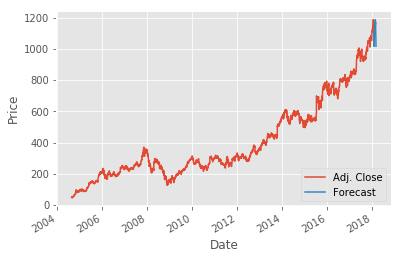

In [32]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## <font color='red'> Episode - 6</font>

What is pickling ?

* <font color='orange'> Does not have to do anything with regression.
* <font color='green + yellow + red + green + green'> It is a good thing to have it at your disposal so you can save yourself a lot of time.
* <font color='cyan'> Pickle is just serialization of any python object. So this could be a dictionary or in our case it can be a classifier.
* <font color='red'> The way pickle works is like a file. You open it write to it save it. Then you wanna open the file and read it. 

Now the question is when do we save a classifier?

* <font color='orange'> We can save the classifier after it has been trained

So now why do we even need to save a classifier?

* <font color='green + green + green + green + green'> The purpose of saving a classifier is to avoid doing the training step because that is a very tedious step
* <font color='cyan'>This is helpful when you have large datasets like having a size of 1 GB or 1 Tb. As training takes the most time. So if everytime you wanna make a prediction you'll have to train the model again and again. This consumes alot of time. So saving the trained model saves more time. 
* <font color='red'> So it is a way to avoid retraining every time you use it.

We first import pickle.

In [33]:
import pickle

In [34]:
clf = svm.SVR(kernel='linear') 
# Don't save here as classifier is untrained
clf.fit(X_train, y_train)
# After training save it.
with open('linearregression.pickle','wb') as f: #/__This how we pickle
    pickle.dump(clf, f)                         #\  the classifier

confidence = clf.score(X_test, y_test)
print(confidence)

#You retreive the saved classifier like this
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)                                                                       

0.9769044136255491


The classifier has been saved now.

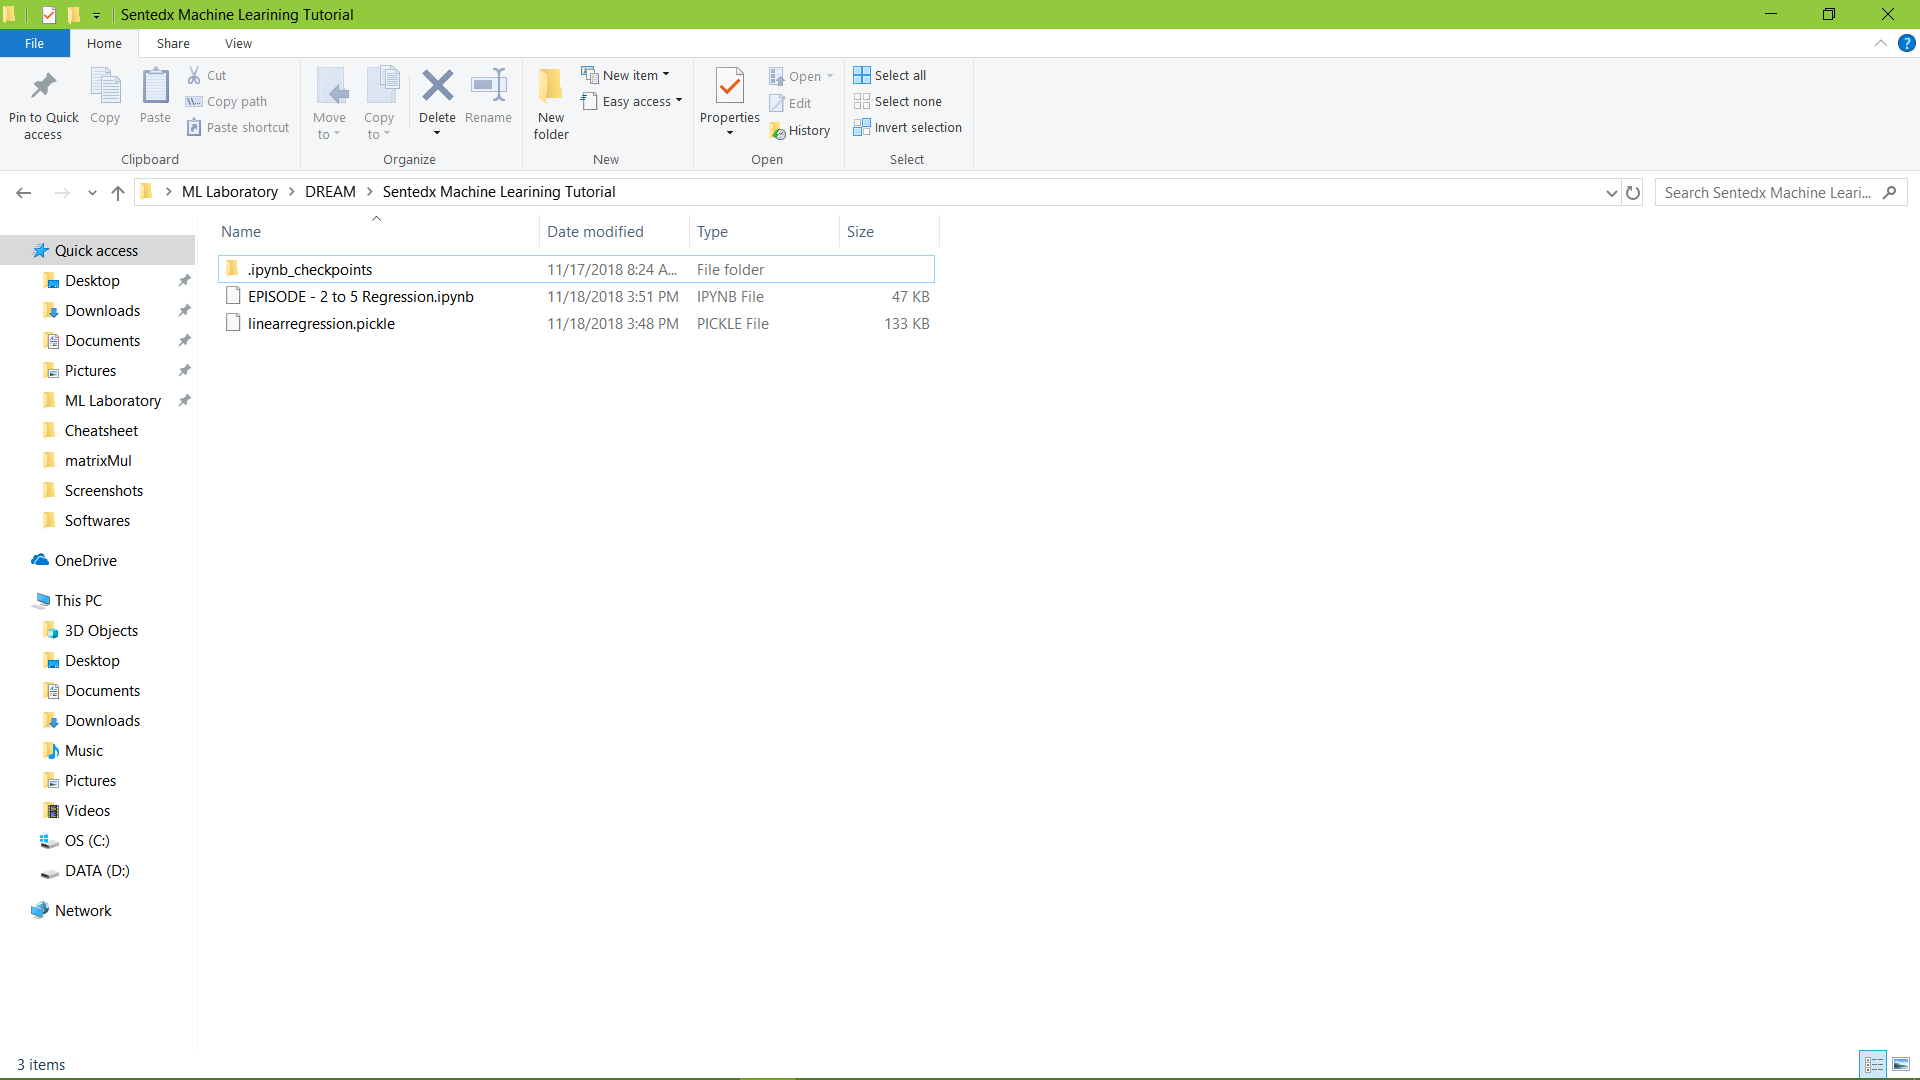


<font color='cyan'>You see this linearregression.pickle file. This type pickle file has the classifier. If we only load the classifier without retraining or save it only read it then also the classifier will work. Open the following link -

[Test for pickled classifier](http://localhost:8889/notebooks/Desktop/ML%20Laboratory/DREAM/Sentedx%20Machine%20Learining%20Tutorial/Test%20for%20pickled%20classifier.ipynb)

# <font color='yellow'>Episode - 7

The objective of linear algebra is to calculate relationships of points in vector space. This is used for a variety of things, but one day, someone got the wild idea to do this with features of a dataset. We can too! Remember before when we defined the type of data that linear regression was going to work on was called "continuous" data? This is not so much due to what people just so happen to use linear regression for, it is due to the math that makes it up. Simple linear regression is used to find the best fit line of a dataset. If the data isn't continuous, there really isn't going to be a best fit line. Let's see some examples:

## Correlation
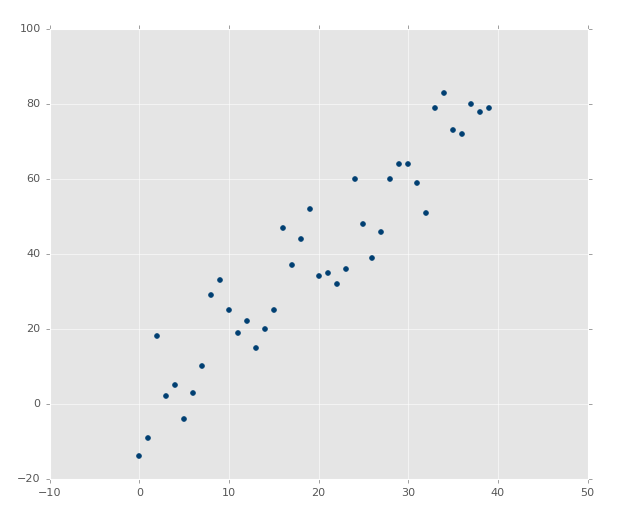

The above image clearly has a nice correlation. If you were asked to draw a best-fit line by estimation, you should be able to easily do something like this:

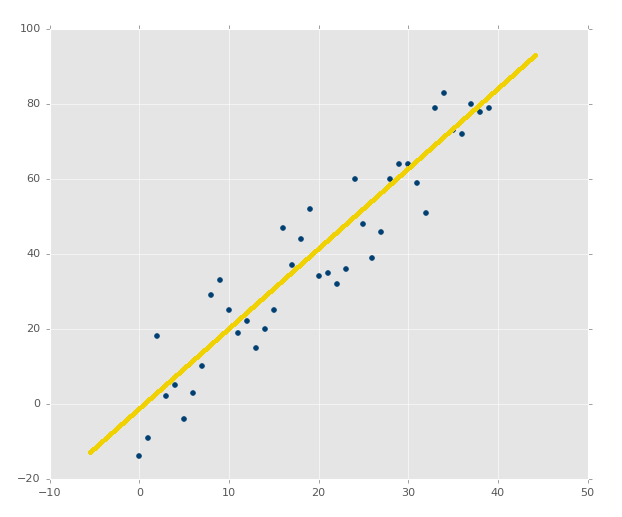

What about an image like:

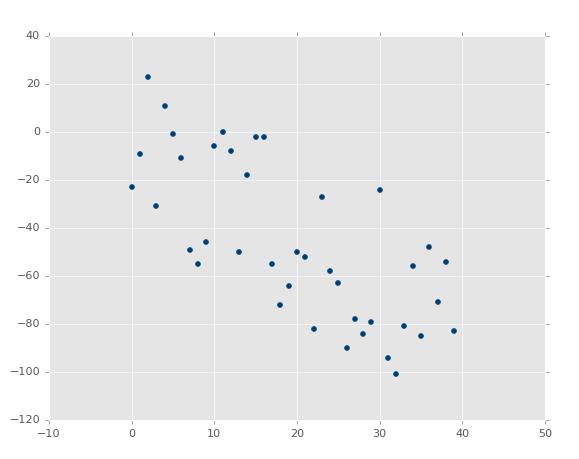

It is not AS obvious, but it is clearly a negative correlation. You could probably draw a best-fit line, but you're much more likely to not actually have the single best fit line in this case.

Finally, what about:

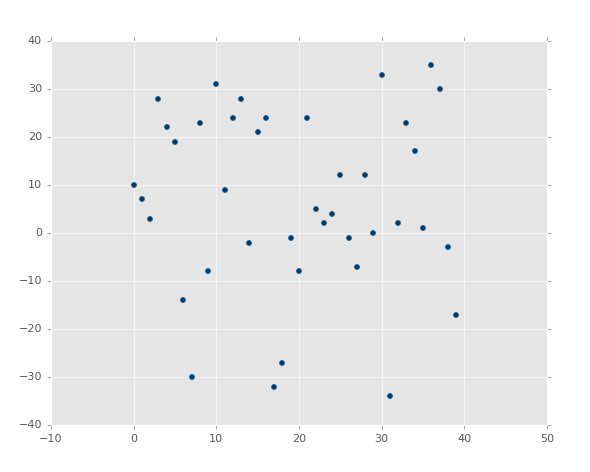

Well?! There is a best-fit line, but good luck figuring it out!

Consider the above images as graphs of features, so the X coordinates are the features and the Y coordinates are the associated labels. Does it appear that X and Y have any sort of seriously structured relationship? While we could calculate the exact relationship, it would be unlikely to have much value to us in the future.

In the cases of the other graphs, it was much more obvious that there was a relationship (the correlation) between X and Y. We can actually discover this relationship, and then plot along any point we wish. We could have a Y and predict an X, or an X and predict a Y, for any point we can think up. We can also predict to what degree of error we have with our model, and even if there's a point at all to the model. How can we do all of this magic? Linear Algebra!

First, let us take a trip back to middle school, where we brush up on the definition of a simple straight line: y = mx + b, where m is the slope and b is the y-intercept. This would be the equation used to discover y, and we could rearrange it instead to discover x using basic algebraic principles: x = (y-b) / m.

Alright, so, our objective is to find the best-fit line. Not just a good-fit line, the best one! The definition of this line will be y = mx + b. The y is the answer (our other coordinate, or it could even be our "feature"), so we'll still be needing m (the slope) and b (y-intercept), since x could be any possible point along the x-axis, so it is already known.

The slope, m, of the best-fit line is defined as:

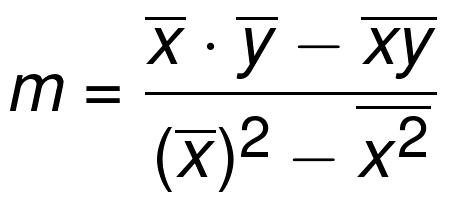

The bar over the letters signifies a mean/average. If two letters are sitting next to eachother, you multiply them. The xs and ys are from all of the existing coordinates. So we now know the m (the slope) of the best-fit line's definition in y=mx+b, now we just need the b (y intercept). There's a formula for that too:

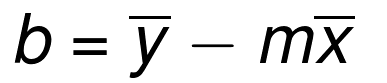

# <font color='purple'> Episode - 8

Now we are going to make a simple linear regression program from scratch. We know the formula of slope and intercept using that knowledge we can make a simple linear regression model using simple python code. For now we'll be working on the slope. 

In [35]:
from statistics import mean # We'll need that for the mean 
import numpy as np

In [36]:
# We create our dataset
xs = np.array([1,2,3,4,5], dtype=np.float64) # Our xs
ys = np.array([5,4,6,5,6], dtype=np.float64)  # Our ys

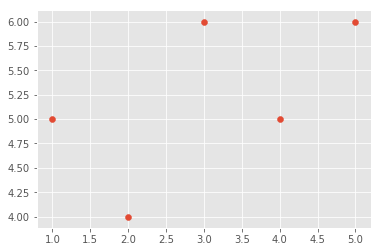

In [37]:
plt.scatter(xs, ys)

In [38]:
def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m


In [39]:
m = best_fit_slope(xs,ys)
print(m)

0.29999999999999893


# <font color='green'> Episode - 9

We have seen how to find the best slope. Now let's see the best intercept. See the formula of the best intercept and slope from episode - 7.

In [40]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

You see the above function will return the m and the b for the best fit line. Our full code is till this point -

In [41]:
from statistics import mean
import numpy as np

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.29999999999999893 4.300000000000003


Now we have to first make a model before going to the predicting process.

In [42]:
regression_line = [(m*x)+b for x in xs]

Same as this - 

In [43]:
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)

To see how well our line fits lets plot the regression line.

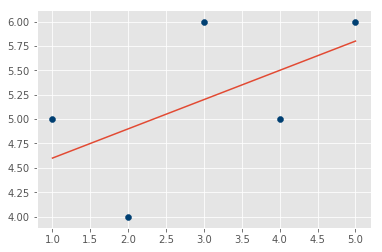

In [44]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

We are ready to predict

In [45]:
predict_x = 7# <------ We are going to predict this

predict_y = (m*predict_x)+b
print(predict_y)

6.399999999999996


Wow that's our prediction 6.4(when rounded to nearest tenths)

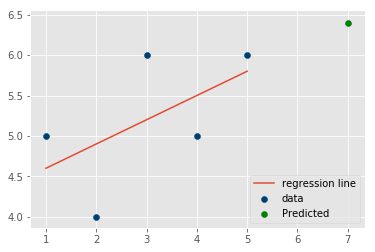

In [46]:
plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.scatter(predict_x, predict_y, color = 'green', label = 'Predicted')
plt.legend(loc=4)
plt.show()

## <font color='gold'> Episode - 10

### <font color='orange'>R-Squared

We have seen how to make a linear regression model using simple python code but now the question is how good of a fit is our best fit line or we can say how do we determine the accuracy?

#### - <font color='red'>The way by which we determine the accuracy is throug r-squared.

#### - <font color='green'> R-squared also known as the coefficient of determination.
    
#### - <font color='purple + green + yellow'> The R-squared is calculated using what is known as squared error

Now the question is, what is squared error because then only we can calculate the R-Squared or the coefficient of determination?

* **<font color='cyan'>Squared error is the distance between the actual and the predicted value squared.**

To simplify let's see the following example -

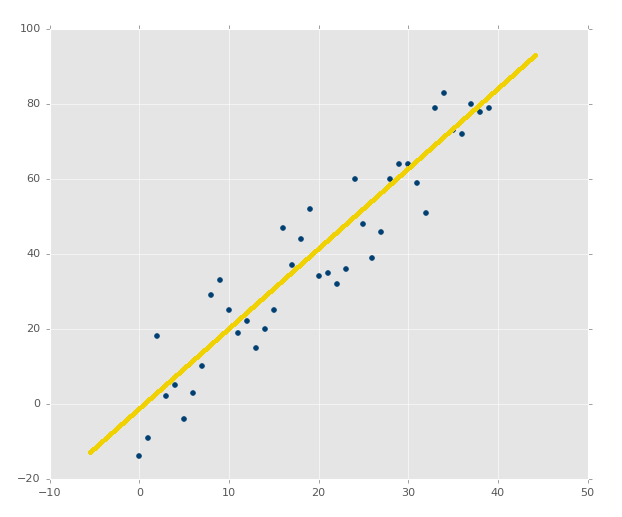

The above image looks like a better fit

compared to something like:
    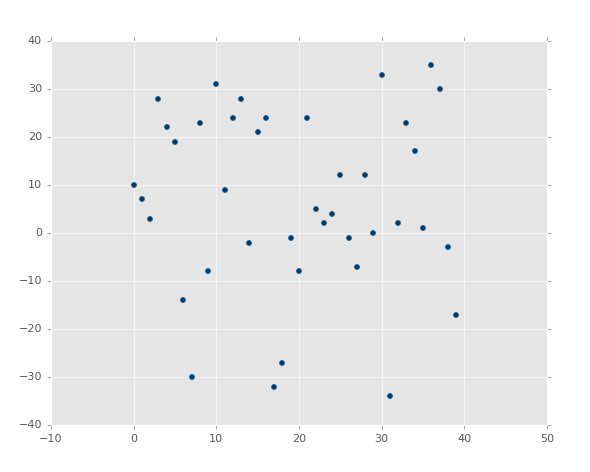

In the second image, there is a best fit line, but who cares. Even the best fitting line is still going to be useless, and we'd like to know that before we spend precious computational power on it.

The standard way to check for errors is by using squared errors. You will hear this method either called r squared or the coefficient of determination. So what is squared error?

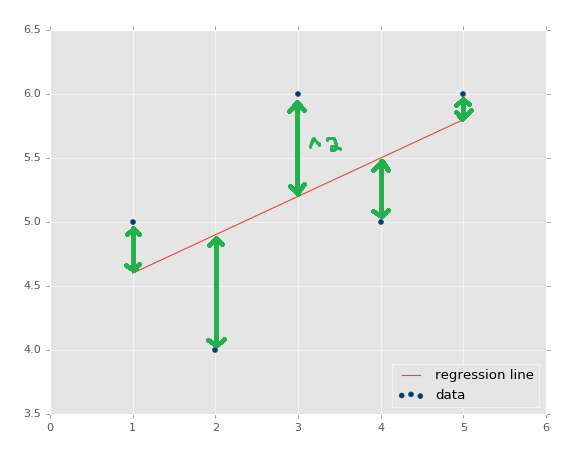

The distance between the regression line's y values, and the data's y values is the error, then we square that. The line's squared error is either a mean or a sum of this, we'll simply sum it.

We actually have already been working with a squared error assumption. Our best-fit line equation is the result of a proof that is used to discover the calculation for the best-fit regression line, where the regression line is the line that has the least squared error. You can search for "regression proof" or "best fit line proof" to get an understanding of the proof. It's fairly easy to follow, and is actually mostly just algebraic rearranging to come to the conclusion.

Now the question is why are we squaring errors and not adding them up?

* **<font color='orange'>First, we want a way to normalize the error as a distance, so the error might be -5, but, when squared, that's a positive number.**

* **<font color='green + green + green + green + green'>Another reason is to further punish for outliers.**

Now you maybe asking if we could use other powers as well like errors to the power of 4 or the errors to the power of 8?

* **<font color='red'>The "further" off something is, the more the it affects the error.**

* **<font color='purple'>This is simply the standard people use**
    
* **<font color='gold'>You could use any powers.**

<font color = 'blue + blue + blue + blue + blue'>You could also just use the absolute value of the errors. If you have a unique challenge, maybe where some extreme outliers do exist, but you don't care to map them, you could consider doing something like an absolute value. If you care a lot about outliers, you could use much higher exponents. We'll stick with squared, as that is the standard almost everyone uses.

<font color ='red + red + blue + blue + green + green + yellow + yellow + pink + pink + brown + brown + mustard + mustard + black'>Squared error is totally relative to the dataset, so we need something more. That's where "r squared" comes in, also called the "coefficient of determination." The equation for this is

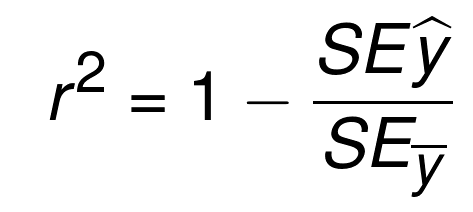

<font color = 'pink'>The equation is essentially 1 minus the division of the squared error of the regression line and the squared error of the mean y line. The mean y line is quite literally the mean of all of the y values from the dataset. If you were to graph it, then it would be a flat, horizontal, line. Thus, we do the squared error of the average y, and of the regression line. The objective here is to discern how much of the error is actually just simply a result in variation in the data features, as opposed to being a result of the regression line being a poor fit.

<font color = 'cyan'>So, the coefficient of determination is the above equation, what do you think is good or bad? We see it's a 1 minus something. Typically, in math, when you see this, the objective is to return a percentage, some number between 0 and 1. What do you think would be a good r-squared/coefficient of determination? Let's say the answer to r-squared here is 0.8. Is that good or bad? Is it better or worse than 0.3? For r-squared to be 0.8, that means the division of the squared error of the regression line and the squared error of the mean of the ys was 0.2. Something like 2/10. That means the error of the regression line was far less than the error of the mean of the ys. Sounds like a good thing to me. Thus, 0.8 is pretty good.


 
<font color = 'purple + pink'>What about compared to 0.3 as the value for the coefficient of determination? In that case, that would mean that the squared error of the regression line divided by the squared error of the mean of the ys line was 0.7. Something like 7/10 would generate this, where 7, in terms of being divided by 10 is far worse than the previous 2 divided by 10, where 7 and 2 are the squared errors of the regression line. Thus, the goal is to have the r squared value, otherwise called the coefficient of determination, as close to 1 as possible.

## <font color = 'blue + blue + blue + blue + blue'>Episode - 11

Now we are going to see how to program R Squared.

<font color = 'blue + orange'> As you remember squared error is the distance between the actual and the predicted value squared.

With the below function, we can calculate the squared error of any line to datapoints, so we can use this sort of syntax for both the regression line and the mean of the ys. That said, squared error is only a part of the coefficient of determination, so let's build that function instead. Since the squared error function is only one line, you could elect to have it just be a line within the coefficient of determination function, but squared error is something you may actually use outside of this function, so I will choose to keep it as its own function.

In [47]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

You must be remembering the coefficient of determinaton also known as R Squared. Here is the 
formula -

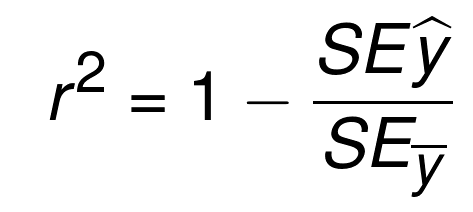

In [48]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

What we've done here is calculate the y mean line, using a 1 liner for loop. Then we're calculating the squared error of the y mean and the regression line using the funcion from just above. Now, all we have left to do is actually calculate the r squared value, which is simply 1 minus the regression line's squared error divided by the y mean line's squared error. We return the value and we're done! All together now, skipping the graph part, the code is:

In [49]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
    
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

##plt.scatter(xs,ys,color='#003F72',label='data')
##plt.plot(xs, regression_line, label='regression line')
##plt.legend(loc=4)
##plt.show()


0.3214285714285714


That's a pretty low value, so actually our best-fit line isn't all that great according to this measure. Is r squared a good measure in this case? 

* **<font color = 'orange + green + yellow'>It may depend on what your goals are.**

* **<font color = 'green + yellow + orange'>In most cases, if you care about <predicting exact future values, r squared is indeed very useful.**
    
* **<font color = 'yellow + orange + green'>If you're interested in predicting motion/direction, then our best fit line is actually pretty good so far, and r squared shouldn't carry as much weight.** 

Look at our actual dataset though. We stuck with low, whole numbers. Variance from value to value was 20-50% at some points, that's a very high variance. It should not be all that surprising that, with this simple dataset, our best fit line still wasn't that descriptive of the actual data.

What is variance?

**- <font color = 'gold'>In statistics and machine learning,   the bias–variance tradeoff is the property of a set of       predictive models whereby models with a lower bias in         parameter estimation have a higher variance of the           parameter estimates across samples, and vice versa.**

What we've just described, however, is an assumption. You know what they say about assume! While we can logically all, I hope, agree with the assumption, we need to come up with a way to test the assumption. The algorithms involved so far are pretty basic, we have only a few layers going on here, so there is not too much room for error, but, later on, you are likely to have layers upon layers. Not just hierarchical layers for the algorithm itself to consider, but the algorithm will be compromised of many layers of algorithms. Where possible, we need to test these to make sure our assumptions about how these algorithms are meant to act are true. Consider how simple it would be to screw up the order of operations in a function, and then, from there, disrupt the entire validity of thousands of lines of code after that!

## <font color = 'pink'> Episode - 12

We've been learning about regression, and even coded our own very simple linear regression algorithm. Along with that, we've also built a coefficient of determination algorithm to check for the accuracy and reliability of our best-fit line. We've discussed and shown how a best-fit line may not be a great fit, but also explained why our example was correct directionally, even if it was not exact. Now, however, we are at the point where we're using two top-level algorithms, which are subsequently comprised of a handful of smaller algorithms. As we continue building this hierarchy of algorithms, we might wind up finding ourselves in trouble if just one of them have a tiny error, so we want to test our assumptions.

What is assumption?

<font color = 'orange + orange + orange + orange + orange + orange'>Machine learning involves the machine evaluating a lot of data and is independent of assumptions, predictive power is strong for these models, thereby reducing human efforts drastically. As we know, lesser the assumptions are, higher will be the predictive power.

What is unit testing?

**<font color = 'green + green + green + green + green'>- In the world of programming, the systematic testing of programs is generally called "unit testing.**

**<font color = 'red'>- This is where, as a large program is built, each tiny sub-system is constantly checked.**
    
**<font color = 'orange'>- As updates and modifcations are made to a large program it can be very easy to accidentally change something that will conflict with a previous system.**

**<font color = 'cyan'>- With machine learning, this can also be a problem, but, our main concern at this point is merely to test our assumptions.**

**<font color = 'gold'>- Eventually, you would be wise to create unit testing for your entire machine learning system, but, for now, we'll just keep it as simple as possible.**

**Important to Note -**

**<font color = 'yellow'>= Our assumption is that we created a best fit line, which we then tested with a coefficient of determination method.**
    
**<font color = 'purple'>= We know (mathematically) that the r squared value will be lower when the best-fit line is worse, and higher (closer to 1), when the best fit line is better.Our assumption is that we've built a system that works this way.**
    
**<font color = 'brown'>= Our system has many parts, and even a simple order of operations error would throw everything out of the window. How could we test our algorithm's behaviors, so that we're confident everything is working as intended?**

The idea here is to create a sample dataset that is defined by us. If we have a positively correlated dataset, where the correlation is quite strong and tight, then r squared should be higher, than if the correlation is weaker and points are not as tightly conformed. The easier it would be for us to personally just eye-ball and estimate the line, the better the machine should perform. Let's build a system that will generate example data that we can dictate these such parameters:

In [50]:
import random # <---- We'll need that

What is step?

**<font color = 'green + green + green + green + green'>In statistics, stepwise regression is a method of fitting regression models in which the choice of predictive variables is carried out by an automatic procedure. In each step, a variable is considered for addition to or subtraction from the set of explanatory variables based on some prespecified criterion.**

Now let's make a function that makes a dataset so we can better understand how R-Squared gets affected by variance, step and correlation.

In [51]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)

Simple enough, we just begin iterating through the range that we chose with the hm (how much) variable, appending the current value plus a random range of the negative variance to positive variance. This gives us data, but currently no correlation if we wanted it. Let's add that:

In [52]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

Next, let's create the xs, which are much easier, then return the whole thing:

In [53]:
def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

Now let's make a sample dataset using our function.

In [54]:
xs, ys = create_dataset(40,40,2,correlation='pos')

Our code is upto this point now:

0.48901278616446486


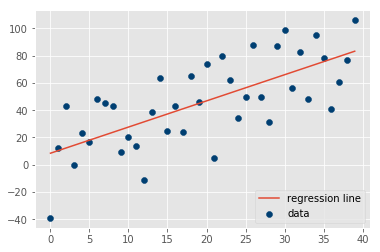

In [55]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b


def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))
    
    r_squared = 1 - (squared_error_regr/squared_error_y_mean)
    return r_squared

xs, ys = create_dataset(40,40,2,correlation='pos')
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

You can see the R-Squared is 0.5108042123949873 with the variance of 40 steps 2 and positive correlation. 

**Great, so our assumption is that our r-squared/coefficient of determination should improve if we made the dataset a more tightly correlated dataset. How would we do that? Simple:*<font color = 'red'>lower variance*!**

Using xs, ys = create_dataset(40,10,2,correlation='pos'):

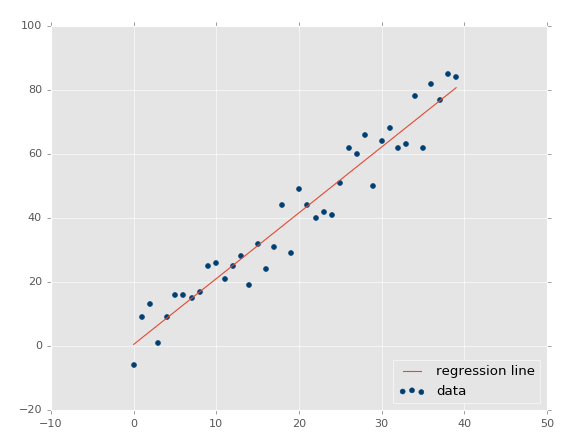

Now our r-squared value: 0.939865240568, much better, as expected. Let's test a negative correlation next:xs, ys = create_dataset(40,10,2,correlation='neg')

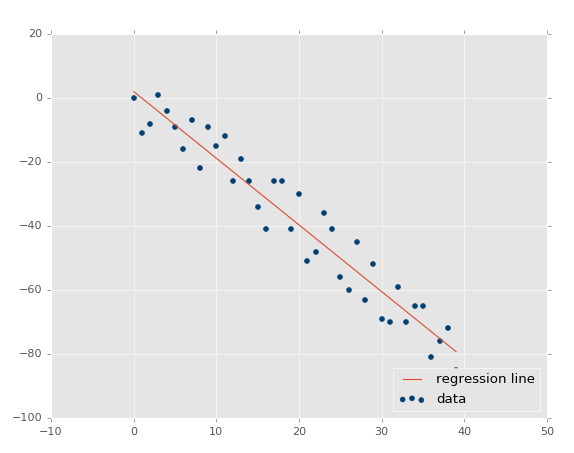

The r squared value: 0.930242442156, which is good that it is very similar to the previous one, since they had the same parameters, just opposite directions.

At this point, our assumptions are panning out and passing the test: Less variance should result in higher r-squared/coefficient of determination, higher variance = lower r squared. What about no correlation? This should be even lower, and actually quite close to zero, unless we get a crazy random permutation that actually has correlation anyway. Let's test it: xs, ys = create_dataset(40,10,2,correlation=False).

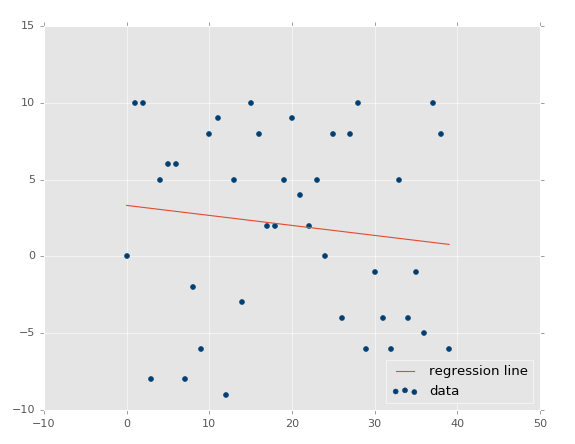

#             The End Of This Notebook

Author                : Tejas Jain

Author's Qualification  : Currently studying in 6th grade

Author's Age          : 11 Years(mentioning age with humble request to rectify                         mistakes, if any in these notes)

Resources             : pythonprogramming.net, google, wikipedia, me(Yes me, no joking)

# About the author:

My name is Tejas Jain. I am from India and I am 11 years old and I study in class 6th. I am interested in machine learning and space. You know machine learning is a hot topics now a days. This notebook is dedicated for regression in machine learning. I know a bit about linear algebra and know nothing at all about calculus and a bit of statistics. So it was tough for me to understand the equations. So these notes are filled with very less formulas and that makes it easy to understand machine learning for people like me. 

# Credits:

1. My parents who encouraged and cheered me that I can learn Machine Learning
2. Eric Grimson's(MIT) MITX60001X online course on Edx that gave me insight of python programming after basic learning from codecademy
2. Sentdex Machine Learning Course
3. Google of course!
4. Wikipedia(that one is also regular)